In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import thisrepo
from actual.scm import read_system

In [ ]:
%%writefile metamorphic-test.conf
[equations]
a=b**2+c**2

[domains]
a: Int(0,100)
b: Int(0,100)
c: Int(0,100)

Overwriting metamorphic-test.conf


/home/me/phd/liab/examples/../src/actual/scm.py:232: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


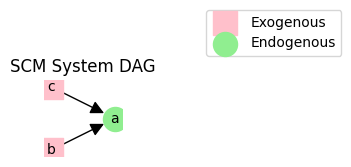

In [3]:
system = read_system('metamorphic-test.conf')
system.display_dag()

if c goes up, so does a
but a is already too high

In [4]:
state = system.get_state({'b': 1, 'c': 2})
state

{'b': 1, 'c': 2, 'a': 5}

In [8]:
from joblib import Parallel, delayed
from tqdm import tqdm
from actual.hp_modified import find_all_causes, pretty_print_causes
from actual.hp_modified_metamorphic import find_all_causes_metamorphic

THR = 90
# Function to execute in parallel
def process_iteration():
    print('----------')
    while True:
        context = system.get_random_context()
        state = system.get_state(context)
        if state['a'] >= THR:
            break
    
    a_results = find_all_causes(system, context, 'a', '>=', THR, include_exo=True)
    a_results['context'] = context
    pretty_print_causes(system, context, a_results)

    print('--')
    a_results_metamorphic = find_all_causes_metamorphic(system, context, 'a', '>=', THR, include_exo=True)
    a_results_metamorphic['context'] = context
    pretty_print_causes(system, context, a_results_metamorphic)
    
    return a_results, a_results_metamorphic


a = process_iteration()
# Number of iterations
num_iterations = 100

# Run in parallel
results = Parallel(n_jobs=-1)(
    delayed(process_iteration)() for i in tqdm(range(num_iterations))
)


----------


100%|██████████| 4/4 [00:00<00:00, 4110.05it/s]


Times: AC1=0.00705, AC2=0.00004
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=7
--


  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 5955.70it/s]


Times: AC1=0.01058, AC2=0.00003
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=7


 48%|████▊     | 48/100 [00:00<00:00, 329.38it/s]

----------
Times: AC1=0.00123, AC2=0.00001
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=7
--
Times: AC1=0.00055, AC2=0.00001
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=7
----------
Times: AC1=0.00105, AC2=0.00002
The fact that b=10 (b'=0)
The fact that b=10 (b'=0) under the contingency c=8
--
Times: AC1=0.00073, AC2=0.00001
The fact that b=10 (b'=0)
The fact that b=10 (b'=0) under the contingency c=8
----------
Times: AC1=0.00089, AC2=0.00002
The fact that c=8 (c'=0)
The fact that c=8 (c'=0) under the contingency b=8
The fact that b=8 (b'=0)
The fact that b=8 (b'=0) under the contingency c=8
--
Times: AC1=0.00085, AC2=0.00002
The fact that c=8 (c'=0)
The fact that c=8 (c'=0) under the contingency b=8
The fact that b=8 (b'=0)
The fact that b=8 (b'=0) under the contingency c=8
----------
Times: AC1=0.00104, AC2=0.00002
The fact that b=10 (b'=0)
The fact that b=10 (b'=0) under the contingency c=7
--
Times: AC1=0.00115, AC2=0.

  0%|          | 0/4 [00:00<?, ?it/s]

----------
Times: AC1=0.00168, AC2=0.00002
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=0
--
Times: AC1=0.00147, AC2=0.00002
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=0
----------
Times: AC1=0.00165, AC2=0.00003
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=5
--
Times: AC1=0.00172, AC2=0.00002
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=5
----------
Times: AC1=0.00092, AC2=0.00003
The fact that c=3 (c'=0)
The fact that c=3 (c'=0) under the contingency b=9
The fact that b=9 (b'=0)
The fact that b=9 (b'=0) under the contingency c=3
--
Times: AC1=0.00087, AC2=0.00003
The fact that c=3 (c'=0)
The fact that c=3 (c'=0) under the contingency b=9
The fact that b=9 (b'=0)
The fact that b=9 (b'=0) under the contingency c=3
----------


100%|██████████| 4/4 [00:00<00:00, 8924.05it/s]


Times: AC1=0.00111, AC2=0.00002
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=2
--
Times: AC1=0.00087, AC2=0.00002
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=2
----------
Times: AC1=0.00104, AC2=0.00002
The fact that c=4 (c'=0)
The fact that c=4 (c'=0) under the contingency b=9
The fact that b=9 (b'=0)
The fact that b=9 (b'=0) under the contingency c=4
--
Times: AC1=0.00078, AC2=0.00002
The fact that c=4 (c'=0)
The fact that c=4 (c'=0) under the contingency b=9
The fact that b=9 (b'=0)
The fact that b=9 (b'=0) under the contingency c=4
----------
Times: AC1=0.00131, AC2=0.00002
The fact that b=10 (b'=0)
The fact that b=10 (b'=0) under the contingency c=4
--
Times: AC1=0.00135, AC2=0.00002
The fact that b=10 (b'=0)
The fact that b=10 (b'=0) under the contingency c=4
----------
Times: AC1=0.00141, AC2=0.00002
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=6
--
Times: AC1=0.00137, AC2=0.00002
The f

100%|██████████| 100/100 [00:00<00:00, 229.10it/s]

----------
Times: AC1=0.00089, AC2=0.00001
The fact that c=9 (c'=0)
The fact that c=9 (c'=0) under the contingency b=7
The fact that b=7 (b'=0)
The fact that b=7 (b'=0) under the contingency c=9
--
Times: AC1=0.00036, AC2=0.00001
The fact that c=9 (c'=0)
The fact that c=9 (c'=0) under the contingency b=7
The fact that b=7 (b'=0)
The fact that b=7 (b'=0) under the contingency c=9
----------
Times: AC1=0.00046, AC2=0.00001
The fact that b=10 (b'=0)
The fact that b=10 (b'=0) under the contingency c=7
--
Times: AC1=0.00075, AC2=0.00002
The fact that b=10 (b'=0)
The fact that b=10 (b'=0) under the contingency c=7
----------
Times: AC1=0.00161, AC2=0.00002
The fact that b=10 (b'=0)
The fact that b=10 (b'=0) under the contingency c=4
--
Times: AC1=0.00134, AC2=0.00002
The fact that b=10 (b'=0)
The fact that b=10 (b'=0) under the contingency c=4
----------
Times: AC1=0.00064, AC2=0.00002
The fact that c=9 (c'=0)
The fact that c=9 (c'=0) under the contingency b=3
The fact that b=3 (b'=0)
The fa

100%|██████████| 4/4 [00:00<00:00, 4797.60it/s]


----------
Times: AC1=0.00086, AC2=0.00002
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=6
--
Times: AC1=0.00086, AC2=0.00002
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=6
----------
Times: AC1=0.00074, AC2=0.00002
The fact that b=10 (b'=0)
The fact that b=10 (b'=0) under the contingency c=3
--
Times: AC1=0.00096, AC2=0.00002
The fact that b=10 (b'=0)
The fact that b=10 (b'=0) under the contingency c=3
----------
Times: AC1=0.00116, AC2=0.00001
The fact that b=10 (b'=0)
The fact that b=10 (b'=0) under the contingency c=4
--
Times: AC1=0.00050, AC2=0.00001
The fact that b=10 (b'=0)
The fact that b=10 (b'=0) under the contingency c=4
----------
Times: AC1=0.00040, AC2=0.00001
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=7
--
Times: AC1=0.00048, AC2=0.00001
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=7
----------
Times: AC1=0.00068, AC2=0.00001
The fact that c=9 (c'


  0%|          | 0/4 [00:00<?, ?it/s]

Times: AC1=0.00129, AC2=0.00002
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=6
--
Times: AC1=0.00094, AC2=0.00002
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=6
----------
Times: AC1=0.00058, AC2=0.00002
The fact that c=9 (c'=0)
The fact that c=9 (c'=0) under the contingency b=3
The fact that b=3 (b'=0)
The fact that b=3 (b'=0) under the contingency c=9
--
Times: AC1=0.00050, AC2=0.00002
The fact that c=9 (c'=0)
The fact that c=9 (c'=0) under the contingency b=3
The fact that b=3 (b'=0)
The fact that b=3 (b'=0) under the contingency c=9
----------
Times: AC1=0.00085, AC2=0.00002
The fact that c=6 (c'=0)
The fact that c=6 (c'=0) under the contingency b=9
The fact that b=9 (b'=0)
The fact that b=9 (b'=0) under the contingency c=6
--
Times: AC1=0.00073, AC2=0.00002
The fact that c=6 (c'=0)
The fact that c=6 (c'=0) under the contingency b=9
The fact that b=9 (b'=0)
The fact that b=9 (b'=0) under the contingency c=6
----------
Ti

  0%|          | 0/4 [00:00<?, ?it/s]

----------
Times: AC1=0.00078, AC2=0.00002
The fact that c=9 (c'=0)
The fact that c=9 (c'=0) under the contingency b=4
The fact that b=4 (b'=0)
The fact that b=4 (b'=0) under the contingency c=9
--
Times: AC1=0.00076, AC2=0.00002
The fact that c=9 (c'=0)
The fact that c=9 (c'=0) under the contingency b=4
The fact that b=4 (b'=0)
The fact that b=4 (b'=0) under the contingency c=9
----------
Times: AC1=0.00070, AC2=0.00002
The fact that c=9 (c'=0)
The fact that c=9 (c'=0) under the contingency b=5
The fact that b=5 (b'=0)
The fact that b=5 (b'=0) under the contingency c=9
--
Times: AC1=0.00051, AC2=0.00001
The fact that c=9 (c'=0)
The fact that c=9 (c'=0) under the contingency b=5
The fact that b=5 (b'=0)
The fact that b=5 (b'=0) under the contingency c=9
----------
Times: AC1=0.00106, AC2=0.00002
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=4
--
Times: AC1=0.00094, AC2=0.00001
The fact that c=10 (c'=0)
The fact that c=10 (c'=0) under the contingency b=4
--

100%|██████████| 4/4 [00:00<00:00, 15019.89it/s]


In [9]:
# Unpacking results
ac2_times_vanilla = [r[0]['ac2_time'] for r in results]
ac3_times_vanilla = [r[0]['ac3_time'] for r in results]

ac2_times_metamorphic = [r[1]['ac2_time'] for r in results]
ac3_times_metamorphic = [r[1]['ac3_time'] for r in results]

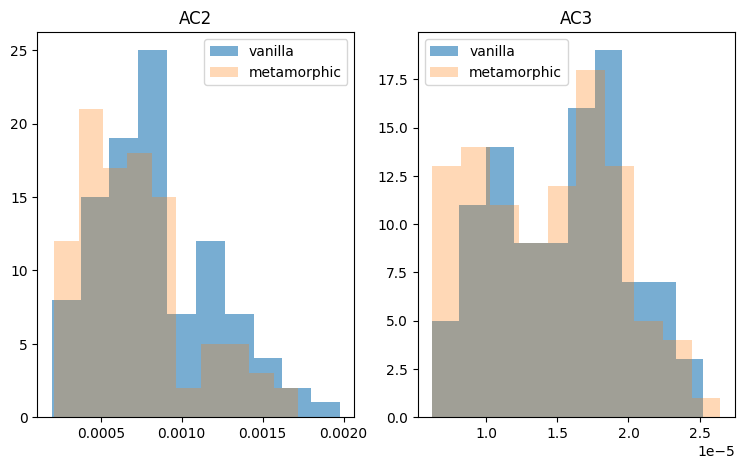

In [10]:
from matplotlib import pyplot as plt


fig, axs = plt.subplots(1,2,figsize=(9,5))
axs[0].hist(ac2_times_vanilla, alpha=.6, label='vanilla')
axs[0].hist(ac2_times_metamorphic, alpha=.3, label='metamorphic')
axs[0].set_title('AC2')
axs[0].legend()

axs[1].hist(ac3_times_vanilla, alpha=.6, label='vanilla')
axs[1].hist(ac3_times_metamorphic, alpha=.3, label='metamorphic')
axs[1].set_title('AC3')
axs[1].legend()


In [23]:
from scipy import stats
N = len(ac2_times_vanilla) + len(ac2_times_metamorphic)
wilcoxon_vanilla = stats.wilcoxon(ac2_times_vanilla, ac2_times_metamorphic)
wilcoxon_vanilla_effect_size = wilcoxon_vanilla.statistic/(N**.5)
#print(f'{wilcoxon_vanilla.statistic=:.3f}, {wilcoxon_vanilla.pvalue=:.5f}, {wilcoxon_vanilla_effect_size=:.3f}')
print(f'AC2 runtime, vanilla vs metamorphic: s={wilcoxon_vanilla.statistic:.3f}, pvalue={wilcoxon_vanilla.pvalue=:.5f}, effect_size={wilcoxon_vanilla_effect_size:.3f}')

wilcoxon_metamorphic = stats.wilcoxon(ac3_times_vanilla, ac3_times_metamorphic)
wilcoxon_metamorphic_effect_size = wilcoxon_metamorphic.statistic/(N**.5)
print(f'AC3 runtime, vanilla vs metamorphic: s={wilcoxon_metamorphic.statistic:.3f}, pvalue={wilcoxon_metamorphic.pvalue=:.5f}, effect_size={wilcoxon_metamorphic_effect_size:.3f}')


AC2 runtime, vanilla vs metamorphic: s=1240.500, pvalue=wilcoxon_vanilla.pvalue=0.00001, effect_size=87.717
AC3 runtime, vanilla vs metamorphic: s=1594.000, pvalue=wilcoxon_metamorphic.pvalue=0.00209, effect_size=112.713


In [ ]:
# top down vs bottom up

# metamorphic relations with quantitative margins 